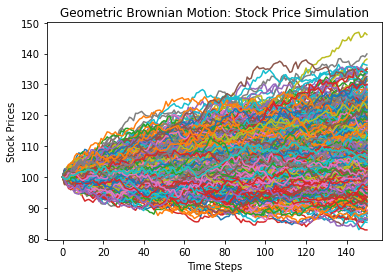

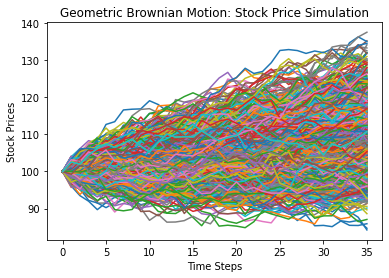

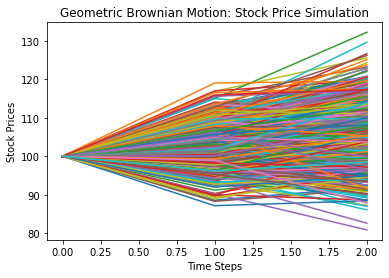

In [295]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

S0= 100
rate= .03
volatility= .05
Years=3 #years 
simulations=1000



def distribution(simulations,dt):
    for y in range(0,simulations-1):
            N=int(Years/dt)#time steps
            S=np.zeros([simulations,N])
            S[y,0]= S0
            for x in range(1,N):
                S[y,x] =S[y,x-1] + rate*S[y,x-1]*dt + volatility*S[y,x-1]*np.random.normal(0,math.sqrt(dt))
            plt.plot(S[y])
    return S , plt.plot(S[y])     

plt.title("Geometric Brownian Motion: Stock Price Simulation")
plt.xlabel("Time Steps")
plt.ylabel("Stock Prices")
P1=distribution(1000,5/252)
plt.show()
plt.title("Geometric Brownian Motion: Stock Price Simulation")
plt.xlabel("Time Steps")
plt.ylabel("Stock Prices")
P2=distribution(1000,21/252)
plt.show()
plt.title("Geometric Brownian Motion: Stock Price Simulation")
plt.xlabel("Time Steps")
plt.ylabel("Stock Prices")
P3=distribution(1000,1)
plt.show()

Assume we have a call option on this stock. The option gives you the right to buy the stock at $110 at the end of year 3(thus the payoff of the options at the end of year 3 is max(St-110,0)
what is the expected payoff at the end of year 3? What is its PV?

In [400]:
rate= .03


def distribution(simulations,dt,volatility,S0):
    N=int(Years/dt)#time steps
    S=np.zeros([simulations,N])
    for y in range(0,simulations-1):
            S[y,0]= S0
            for x in range(1,N):
                S[y,x] =S[y,x-1] + rate*S[y,x-1]*dt + volatility*S[y,x-1]*np.random.normal(0,math.sqrt(dt))
    EndPrice=S[:,-1]
    payoff_average=np.average(np.maximum(EndPrice-K,0))
    presentvalue=payoff_average*math.exp(-rate*Years)
    print("Expected Payoff =" ,payoff_average, "Present Value of Payoff =" ,presentvalue)
    

distribution(1000,5/252,.05,100)

Expected Payoff = 3.76830789390422 Present Value of Payoff = 3.4439740999428095


In [401]:
distribution(1000,5/252,.05,97)

Expected Payoff = 2.0880036347107973 Present Value of Payoff = 1.9082916367218716


In [402]:
distribution(1000,5/252,.05,103)

Expected Payoff = 5.166681730758148 Present Value of Payoff = 4.721991558110995


In [403]:
distribution(1000,5/252,.03,100)

Expected Payoff = 2.1420248789139813 Present Value of Payoff = 1.957663336466314


In [404]:
distribution(1000,5/252,.07,100)

Expected Payoff = 4.739817710184477 Present Value of Payoff = 4.331867217838457


In [392]:
rate= .03

def distribution(simulations,dt,volatility,S0):
    N=int(Years/dt)#time steps
    S=np.zeros([simulations,N])
    for y in range(0,simulations-1):
            S[y,0]= S0
            for x in range(1,N):
                S[y,x] =S[y,x-1] + rate*S[y,x-1]*dt + volatility*S[y,x-1]*np.random.normal(0,math.sqrt(dt))
    EndPrice=S[:,-1]
    payoff_average=np.average(np.maximum(EndPrice-K,0))
    presentvalue=payoff_average*math.exp(-rate*Years)
    return(payoff_average,presentvalue)
    
vol=list(x/100 for x in range(0,50))
start=list(range(95,145))
data=zip(vol,start)
Vega=[]
Delta=[]

for volatility,S in data:
    V=distribution(1000,5/252,volatility,100)
    D=distribution(1000,5/252,.05,S)
    Vega.append(V[1])
    Delta.append(D[1])
    #Vega.update({volatility:distribution(1000,5/252,volatility,100)[0]})
    #Delta.update({S0:distribution(1000,5/252,.05,S0)[0]})
    
print(Vega, Delta)



[0.0, 0.44414155819178086, 1.0695789371380775, 1.7263960524374968, 2.2606323389462033, 3.2214080717082507, 3.9907638756079584, 4.38060531332594, 5.683658245570742, 5.8218904183263955, 5.943407536195256, 7.0863905152060545, 7.834307056540105, 8.800811716290925, 9.406998748220472, 10.761939475837933, 11.049657174720332, 10.687565984585023, 12.60890929362878, 11.676558201551606, 13.95890090825541, 13.348279731217975, 14.944871354554225, 14.391026544538649, 16.823079328367477, 17.84947040209664, 19.057483229008447, 18.46974251437961, 19.605899690602143, 16.99387018905151, 22.346209152241265, 20.409638972769976, 19.60552192127239, 20.543731611347283, 22.292016192791937, 24.575977496579643, 23.14063964801341, 23.6347217251689, 23.6278884770655, 27.01235141959104, 24.990791456721613, 25.03834032417366, 27.501639618919114, 30.364945682298508, 32.117137863862595, 29.68580157508191, 31.674388420071654, 33.0201446388932, 30.19181750180393, 31.424236496013133] [1.457231260241204, 1.575957366724549

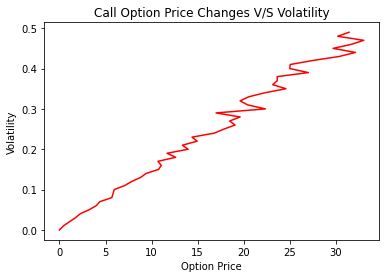

In [405]:
plt.plot(Vega,vol,color='r')
plt.title("Call Option Price Changes V/S Volatility")
plt.xlabel("Option Price")
plt.ylabel("Volatility")
plt.show()

#### Pay off increases as we increase the volatility. As the volatility increases an investor is more prone to changes in the value of the underlying stock thus leading to higher chances of increase in payoff (MAX(St-K,0)). Thus, increasing the option price

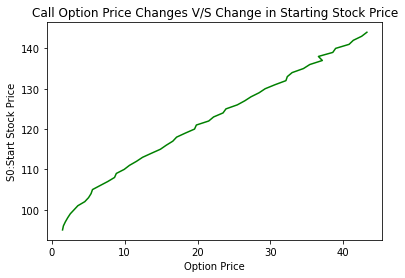

In [394]:
plt.plot(Delta,start,color='g')
plt.title("Call Option Price Changes V/S Change in Starting Stock Price")
plt.xlabel("Option Price")
plt.ylabel("S0:Start Stock Price")
plt.show()

#### Pay off increases as we increase the starting stock price. As the starting point increases the 1000 simulations across "dt" yield higher stock prices and result in higher expected pay off and hence, option price